# Solving first order ODE - Nelder Mead

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
## no class definitions

def sig(x): 
    return 1/(1 + np.exp(-x))
    
def sig_first(x): # first derivative of sigmoid
    return sig(x)*(1 - sig(x))      

def sig_second(x): # first derivative of sigmoid
    return sig_first(x)*(1 - sig(x)) - sig(x)*sig_first(x)
 
    

# output of nn
def compute(arr):
    arr_new_dim = np.reshape(arr, (-1, 1))
    w = arr_new_dim[0:global_n]
    b = arr_new_dim[global_n:2*global_n]
    v = arr_new_dim[2*global_n:3*global_n]
    
    hid_layer = np.add(np.dot(global_inp, np.transpose(w)), np.transpose(b))
    act_func = sig(hid_layer)
    
    #foo = np.dot(act_func, v)
    #foo[foo < 0] = 0
    
    return np.dot(act_func, v)
    #return foo


# first derivative of nn
def compute_first(arr):
    arr_new_dim = np.reshape(arr, (-1, 1))
    w = arr_new_dim[0:global_n]
    b = arr_new_dim[global_n:2*global_n]
    v = arr_new_dim[2*global_n:3*global_n]
    
    hid_layer = np.add(np.dot(global_inp, np.transpose(w)), np.transpose(b))
    act_func = sig_first(hid_layer)
    
    #foo = np.dot(act_func, v*w)
    #foo[foo < 0] = 0
    
    return np.dot(act_func, v*w)
    #return foo

# second derviative of nn
def compute_second(arr):
    arr_new_dim = np.reshape(arr, (-1, 1))
    w = arr_new_dim[0:global_n]
    b = arr_new_dim[global_n:2*global_n]
    v = arr_new_dim[2*global_n:3*global_n]
    
    hid_layer = np.add(np.dot(global_inp, np.transpose(w)), np.transpose(b))
    act_func = sig_second(hid_layer)
    
    #foo = np.dot(act_func, v*(w**2))
    #foo[foo < 0] = 0
    
    return np.dot(act_func, v*(w**2))
    #return foo

# trial solution
def y_trial(arr):
    Al = A/(b-a)
    Bl = B/(b-a)
    return Al*(b - global_inp) + Bl*(global_inp - a) + (b - global_inp)*(global_inp - a)*compute(arr)

# trial solution first derivative
def y_trial_first(arr):
    Al = A/(b-a)
    Bl = B/(b-a)
    return -Al + Bl + (-2*global_inp + (b+a))*compute(arr) + (-(global_inp**2) +(b+a)*global_inp - b*a)*compute_first(arr)

# trial solution second derivative
def y_trial_second(arr):
    return -2*compute(arr) + 2*(-2*global_inp +(b+a))*compute_first(arr) + (-(global_inp**2) +(b+a)*global_inp - b*a)*compute_second(arr)



## Problem 4

$$
  \frac{d^2y}{dx^2} = cos(x), ~~y(0) = 1, y(\frac{\pi}{2})=2
$$

We will solve for x in [0, pi/2].

11.633014912142613
1.5941245151258437e-06


Text(0, 0.5, 'y')

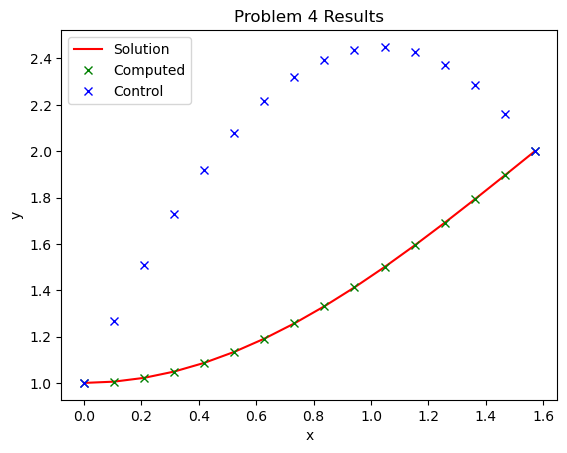

In [3]:
# global definitions:
A = 1
B = 2
a = 0
b = np.pi/2

k_points = 15
global_inp = np.arange(a, b+(b-a)/k_points, (b-a)/k_points)
global_inp = np.reshape(global_inp, (-1, 1))

# arr = [w1, ..., wn, b1, ..., bn, v1, ..., vn] 
weights = [0.2, 0.3, 0.3,      0.4, 0.5, 0.5,      0.6, 0.7, 0.8]
global_n = 3

def myf(x):
    return np.cos(x)

def cost(arr):
    return np.mean((y_trial_second(arr) - myf(global_inp))**2)

def real_sol(x):
    return -np.cos(x) + 2

print(cost(weights))

opt_results = optimize.minimize(cost, weights, method='Nelder-Mead')
new_weights = opt_results['x']
print(cost(new_weights))

plt.plot(global_inp, real_sol(global_inp), 'r-',global_inp, y_trial(new_weights), 'gx',global_inp, y_trial(weights), 'bx')
plt.legend(["Solution", "Computed", "Control"])
plt.title("Problem 4 Results")
plt.xlabel("x")
plt.ylabel("y")


## Problem 5

$$
  \frac{d^2y}{dx^2} = -(y+2y^3), ~~y(-10) = 0, y(10)=0
$$

We will solve for x in [-10, 10].

740042.9532555325
239837.9692910585


Text(0, 0.5, 'x')

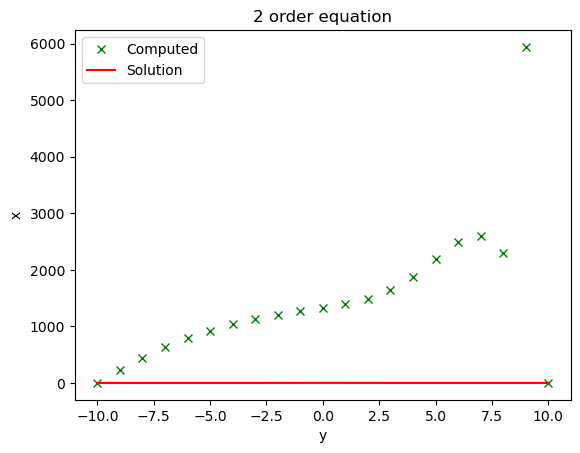

In [4]:
# global definitions:
A = 0
B = 0
a = -10
b = 10

k_points = 20
global_inp = np.arange(a, b+(b-a)/k_points, (b-a)/k_points)
global_inp = np.reshape(global_inp, (-1, 1))

# arr = [w1, ..., wn, b1, ..., bn, v1, ..., vn] 
weights = [0.2, 0.3, 0.3,      0.4, 0.5, 0.5,      0.6, 0.7, 0.8]
global_n = 3

def myf(x):
    return x-2*(x**3)

def cost(arr):
    return np.mean((y_trial_second(arr) - myf(global_inp))**2)

def real_sol(x):
    return 2/(np.exp(x) + np.exp(-x))


print(cost(weights))
opt_results = optimize.minimize(cost, weights, method='Nelder-Mead')
new_weights = opt_results['x']
print(cost(new_weights))

plt.plot(global_inp, y_trial(new_weights), 'gx', global_inp, real_sol(global_inp), 'r-')
plt.legend(["Computed", "Solution"])
plt.title("2 order equation")
plt.xlabel("y")
plt.ylabel("x")